# Housing Prices Prediction

## Business Problem

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Assignment Goal

The company wants to know:

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Additionally, we also need to determine:

* The optimal value of lambda for Lasso and Ridge regression.

## Steps Involved:-

* **Exploratory Data Analysis**
    * Data Inspection: Quick overview of the dataset
    * Data Cleaning: This will include the following, either individually or combined:-
        * Dropping unnecessary variables
        * Modifying existing variables and/or deriving new ones for better interpretation
        * Missing Value Treatment
        * Outlier Treatment
        * Dropping Highly Skewed Variables
        * Univariate/Bivariate Analysis
* **Data Preparation**
    * Dummy Variable Creation for Categorical Variables
    * Train/Test Split of dataset
    * Scaling/Transformation of Numeric Variables

* **Model Building & Evaluation**
    * Recursive Feature Elimination (RFE)
    * Feature Elimination using StatsModels, p-value and VIF
    * Ridge Regression
    * Lasso Regression
* **Summary**

## 1. Exploratory Data Analysis

### 1.1 Data Inspection

We start with a quick inspection to get an understanding of the basics aspects of our dataset.

In [968]:
# Import initial set of relevant packages

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [969]:
# Display all rows and columns when viewing data

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [970]:
# Read the data in from the csv file

df = pd.read_csv('train.csv')

In [971]:
# View sample rows

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [972]:
# Check dimensions of the data

df.shape

(1460, 81)

In [973]:
# Check data types and nulls in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can see that there are some columns with null values. We will explore them further as part of the Data Cleaning process. Let us now separately look at numeric and categorical variables.

In [974]:
# Create variables for storing numeric and categorical columns
df_numeric = df.dtypes[df.dtypes != "object"].index
df_categorical = df.dtypes[df.dtypes == 'object'].index

# Number of numeric and categorical variables

print("Numeric Variables = ",len(df_numeric))
print("Categorical Variables = ",len(df_categorical))

Numeric Variables =  38
Categorical Variables =  43


In [975]:
# View sample of data related to numeric variables
df[df_numeric].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [976]:
# View sample of data related to categorical variables
df[df_categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [977]:
# A quick view of the spread of numerical variables in our dataset

df[df_numeric].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Now that we are familiar with some of the general aspects of the data, we will move on the next step of EDA: Data Cleaning.

### 1.2 Data Cleaning

We will start by dropping some of the variables that we can deem as not useful for model building, namely:-

* ID: Auto generated ID that is unncessary for analysis.
* GarageYrBlt: Since we already have YearBuilt, this variable is unnecessary.
* MoSold: Sold month hardly adds value since sale of houses are not influenced by season or time of the year.
* YearRemodAdd: Since over 50% of the entries are the same as YearBuilt (likely due to the entries being a duplicate of YearBuilt as suggested in the data dictionary), we will drop this to avoid collinearity.

In [978]:
#Drop unnecessary variables

df.drop(['Id','GarageYrBlt','MoSold','YearRemodAdd'],axis = 1, inplace = True)

We will next look at some variables that in the current format are not useful and derive new variables according that will better serve us:-

* YearBuilt: Derive the Age of the house (basis current year) in Years.
* YrSold: Derive the difference in Years between YearBuilt and YrSold.

In [979]:
#Derive new variables

df['House_Age_Sold'] = df['YrSold'] - df['YearBuilt']
df['House_Age_Current'] = 2020 - df['YearBuilt']

In [980]:
#Checking newly created variables

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,House_Age_Sold,House_Age_Current
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2008,WD,Normal,208500,5,17
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,2007,WD,Normal,181500,31,44
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,2008,WD,Normal,223500,7,19
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2006,WD,Abnorml,140000,91,105
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,2008,WD,Normal,250000,8,20


In [981]:
#Dropping the Year variables no longer needed

df.drop(['YrSold','YearBuilt'], axis = 1, inplace = True)

**Missing Value Treatment**

Next, we will check the percentage of nulls that some of the features have.

In [982]:
# View columns that have any missing values at all

df_null = df.isnull().sum(axis = 0)
round(df_null[df_null > 0]/len(df) * 100,2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

We will drop all features that have above 45% of missing values as this is quite high and will add unncessary bias to the model.

In [983]:
# Dropping features with high missing values

df.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],axis = 1,inplace = True)

In [984]:
# Refresh variables storing numeric and categorical columns

df_numeric = df.dtypes[df.dtypes != "object"].index
df_categorical = df.dtypes[df.dtypes == 'object'].index

# Print current number of numeric and categorical variables

print("Numeric Variables = ",len(df_numeric))
print("Categorical Variables = ",len(df_categorical))

Numeric Variables =  34
Categorical Variables =  38


Lets look at the numeric features with missing values.

In [985]:
# Numeric features with nulls

round(df_null[(df_numeric) & (df_null[df_null > 0]).index]/len(df) * 100,2)

LotFrontage    17.74
MasVnrArea      0.55
dtype: float64

The above features can be treated using the median values.

In [986]:
# Replace nulls with median values

df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace = True)

We will now look at the categorical features with missing values.

In [987]:
# Categorical features with nulls

round(df_null[(df_categorical) & (df_null[df_null > 0]).index]/len(df) * 100,2)

MasVnrType      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

From the data dictionary, we know that for some of these variables, the null values actually stand for 'NA' indicating that these features are unavailable. For eg - GarageType has 5.55% of NaN or 'NA' which actually means that there is 'No Garage'. This incorrect interpretation by Pandas will need to be fixed manually for the following features:-

* BsmtQual
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* GarageType
* GarageFinish
* GarageQual
* GarageCond

In [988]:
basement_replace = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
garage_replace = ['GarageType','GarageFinish','GarageQual','GarageCond']

for feature in basement_replace:
    df[feature] = df[feature].replace(np.NaN,'No Basement')

for feature in garage_replace:
    df[feature] = df[feature].replace(np.NaN,'No Garage')

We will now check the remaining categorical features with null values.

In [989]:
# Remaining Categorical features with nulls

df_null = df.isnull().sum(axis = 0)
round(df_null[(df_categorical) & (df_null[df_null > 0]).index]/len(df) * 100,2)

MasVnrType    0.55
Electrical    0.07
dtype: float64

Since these features have very low percentage of null values, we can impute them with the mode of their respective features.

In [990]:
df['MasVnrType'].fillna(df['MasVnrType'].mode(), inplace = True)
df['Electrical'].fillna(df['Electrical'].mode(), inplace = True)

**Checking for Skewness**

We will start with categorical variables and check to see which of them are skewed. We can use horizontal bar plots to visually identify the highly skewed variables by plotting sub categories in terms of percentages. Since there are 38 categorical variables, we will look at them in batches and analyze each of them. Our criterias to drop a variable will be based on the following:-

* Any one sub category is dominating with a share of 70-80%
* Any one sub category is dominating while other categories are significantly low in share (low single digits)

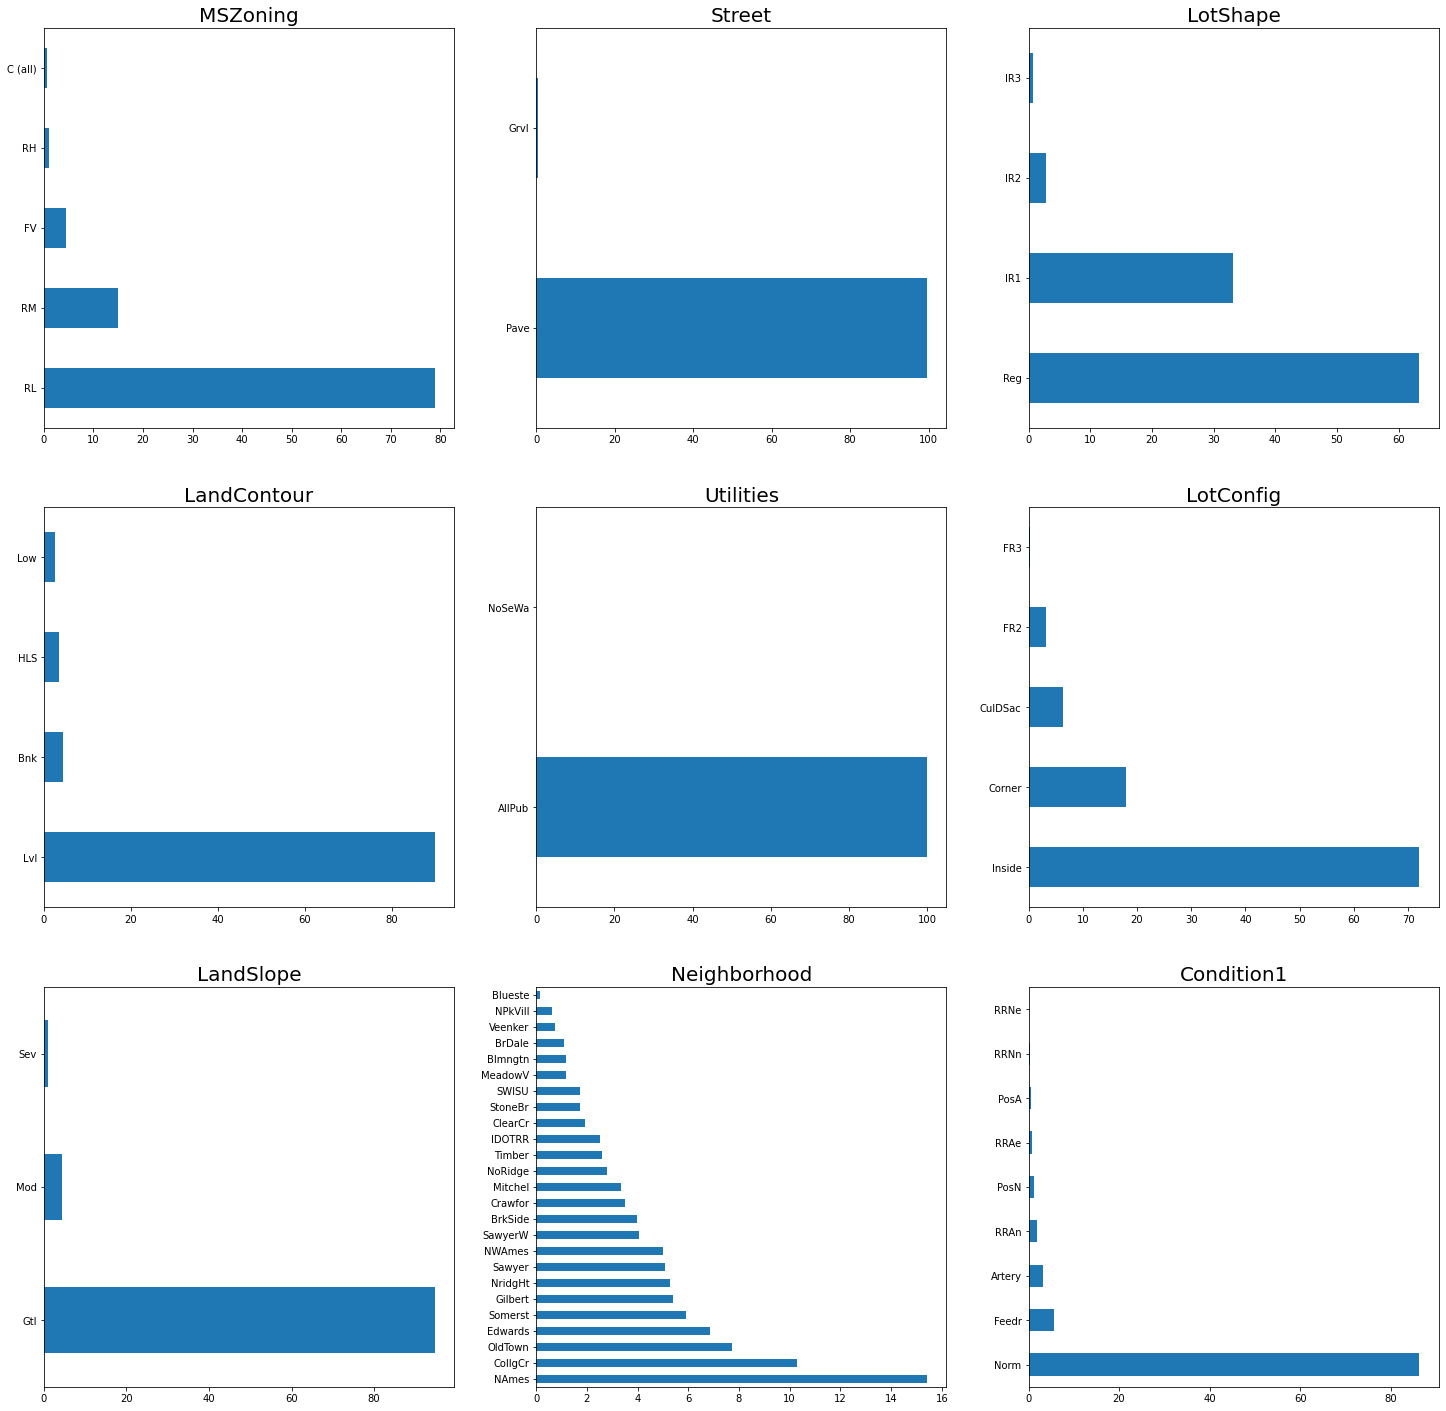

In [991]:
# Plot the first 9 categorical variables

plt.figure(figsize = (25,25))

for i in enumerate(df_categorical[0:9]):
    plt.subplot(3,3,i[0]+1)
    (df[i[1]].value_counts(normalize = True)*100).plot.barh()
    plt.title(label = i[1], fontsize = 20)

We could observe from the above that the following variables were highly skewed towards a certain entry and can therefore be dropped:-

* MSZoning
* Street
* LandContour
* Utilities
* LotConfig
* Landslope
* Condition1

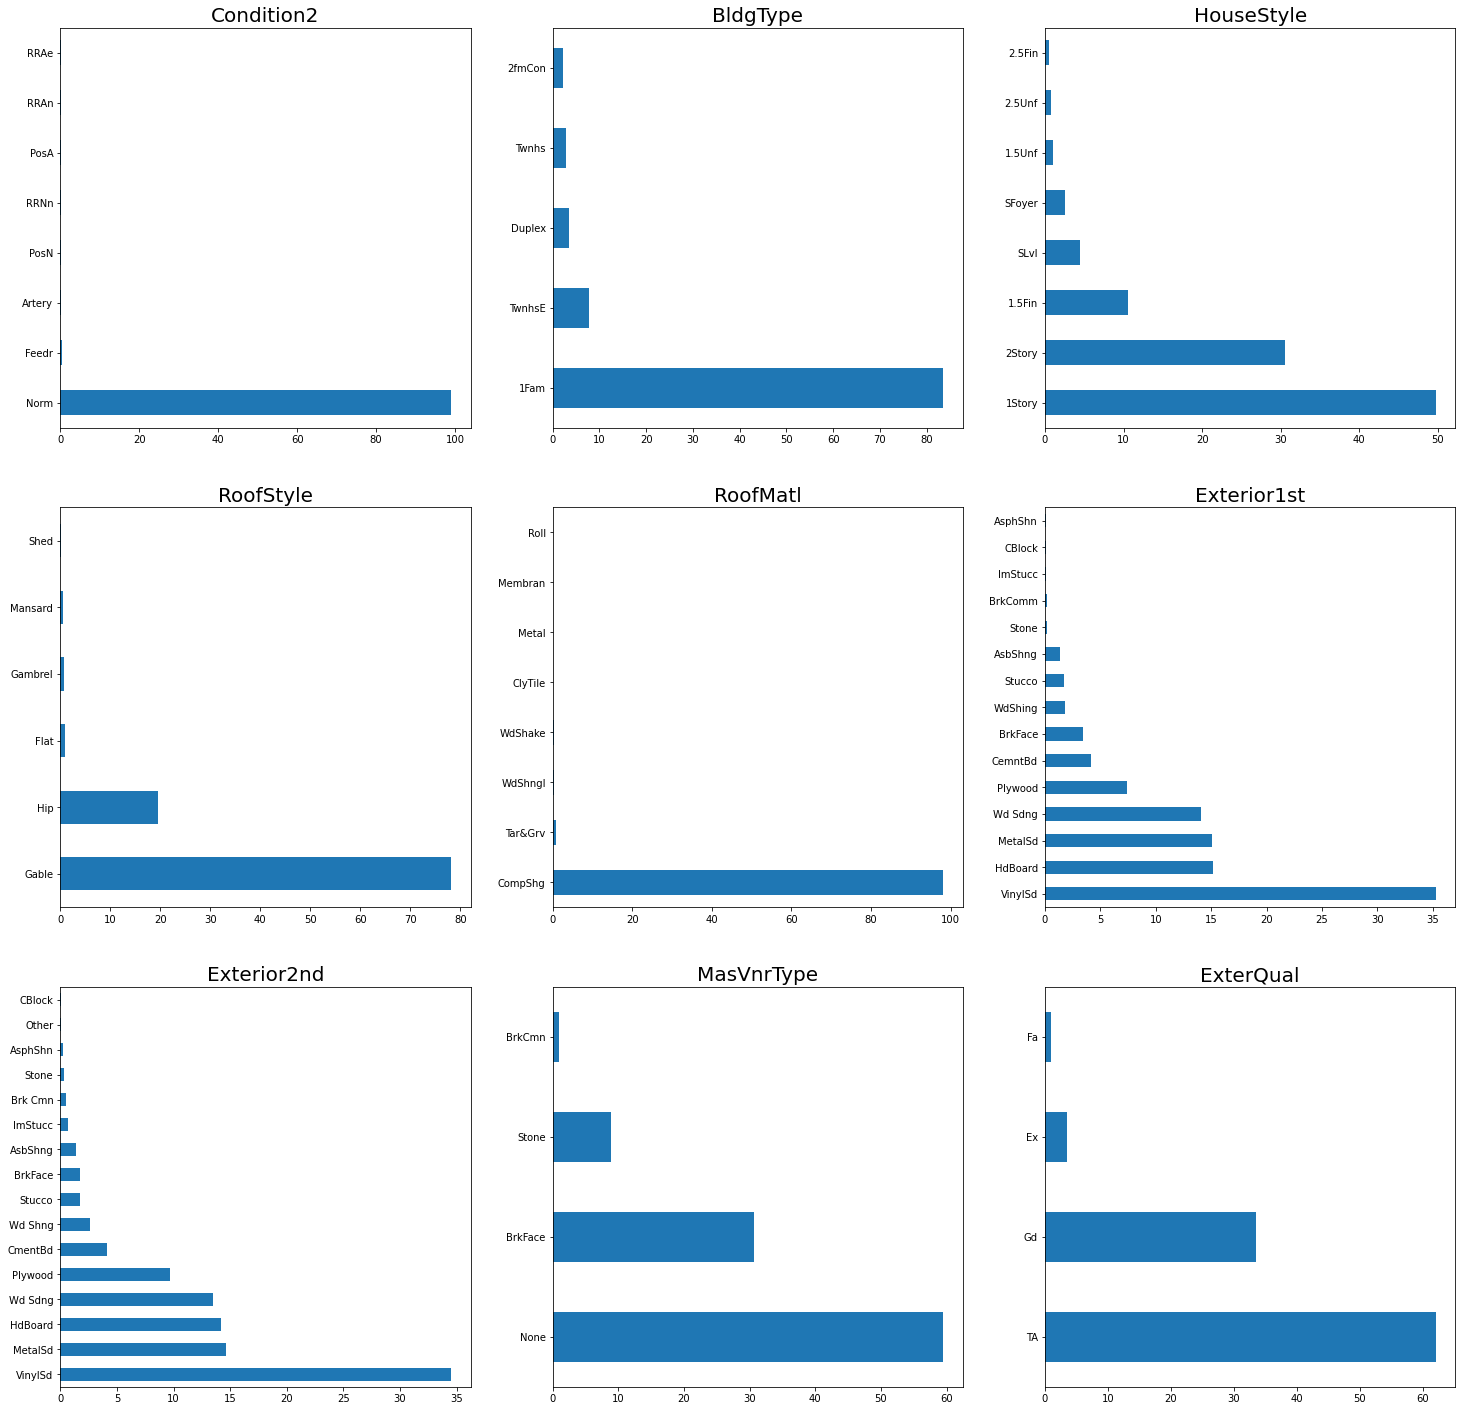

In [992]:
# Plotting the next set of categorical variables

plt.figure(figsize = (25,25))

for i in enumerate(df_categorical[9:18]):
    plt.subplot(3,3,i[0]+1)
    (df[i[1]].value_counts(normalize = True)*100).plot.barh()
    plt.title(label = i[1], fontsize = 20)

From this set of visualizations,we can decide to drop the following:-

* Condition2
* BldgType
* RoofStyle
* RoofMatl

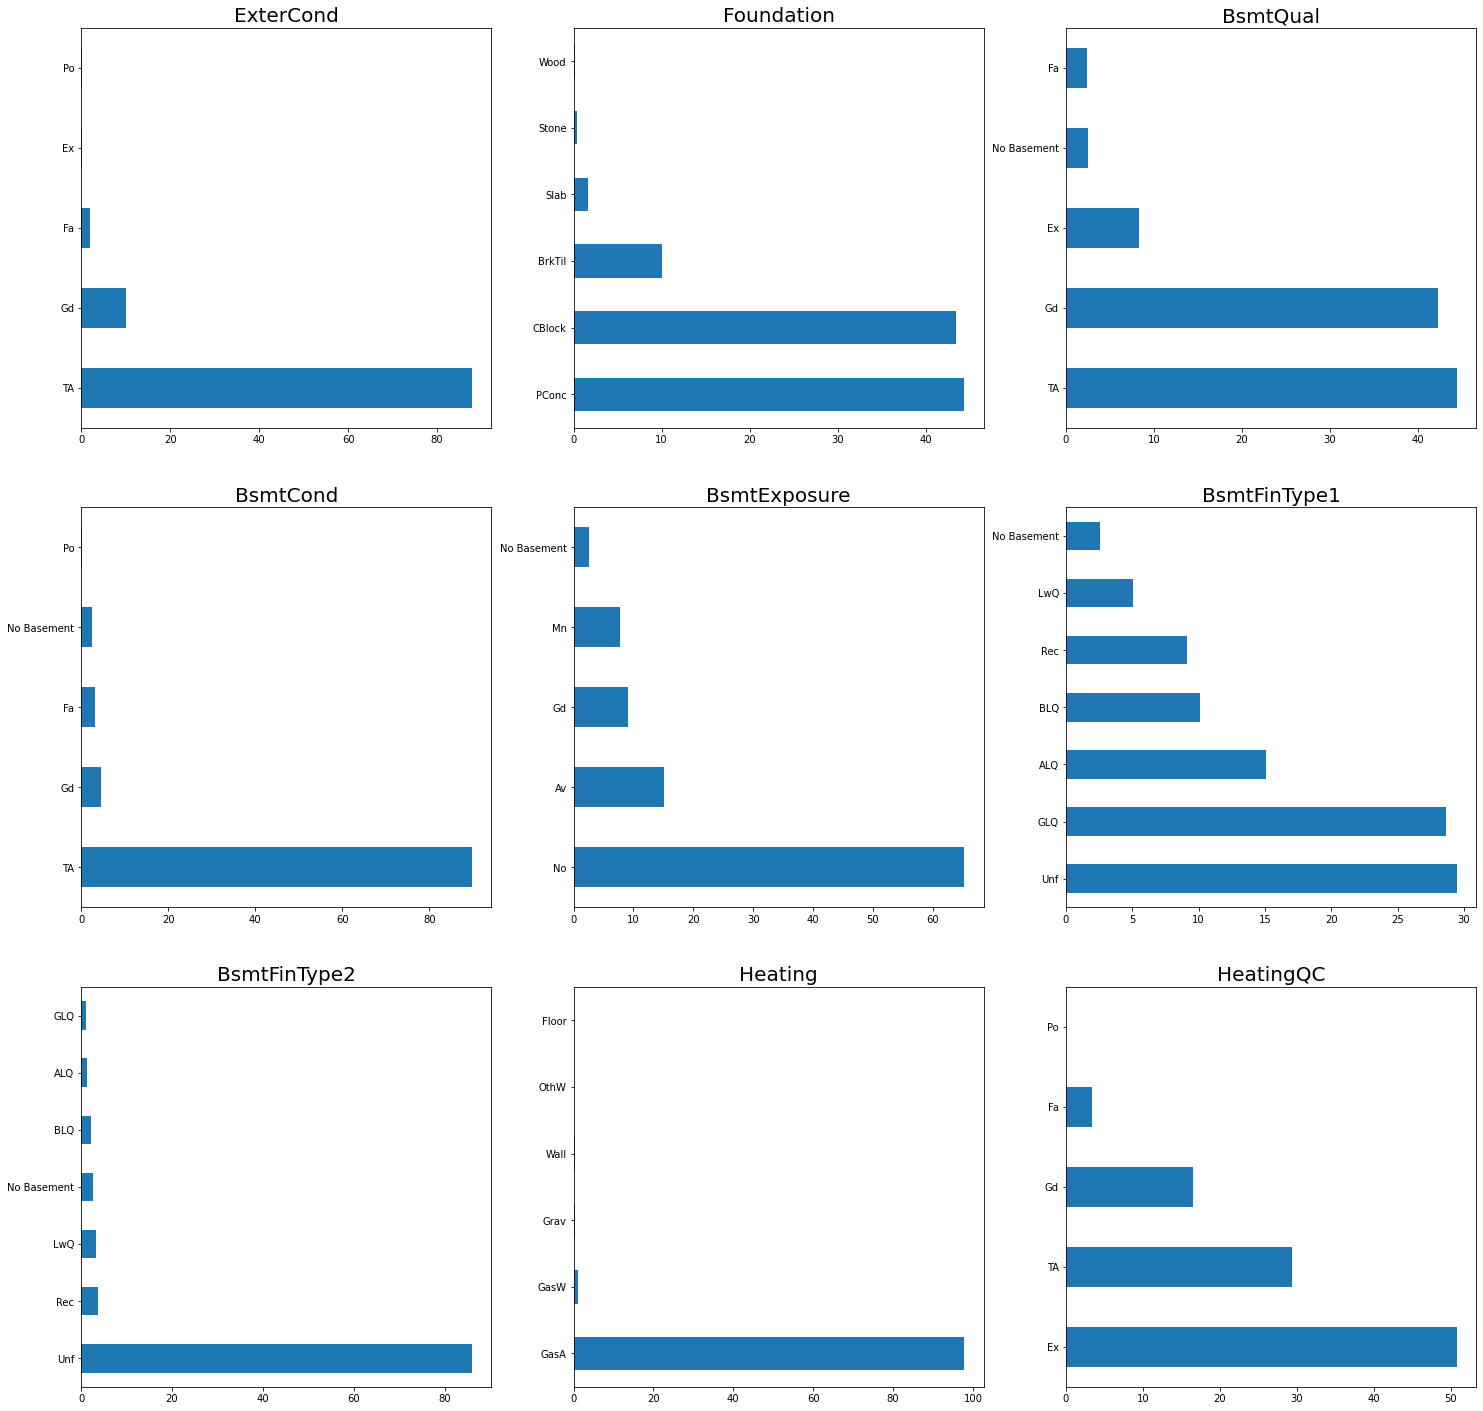

In [993]:
# Plot the next set of categorical variables

plt.figure(figsize = (25,25))

for i in enumerate(df_categorical[18:27]):
    plt.subplot(3,3,i[0]+1)
    (df[i[1]].value_counts(normalize = True)*100).plot.barh()
    plt.title(label = i[1], fontsize = 20)

We will be dropping the following variables basis above visualizations:-

* ExterCond
* BsmtCond
* BsmtFinType2
* Heating

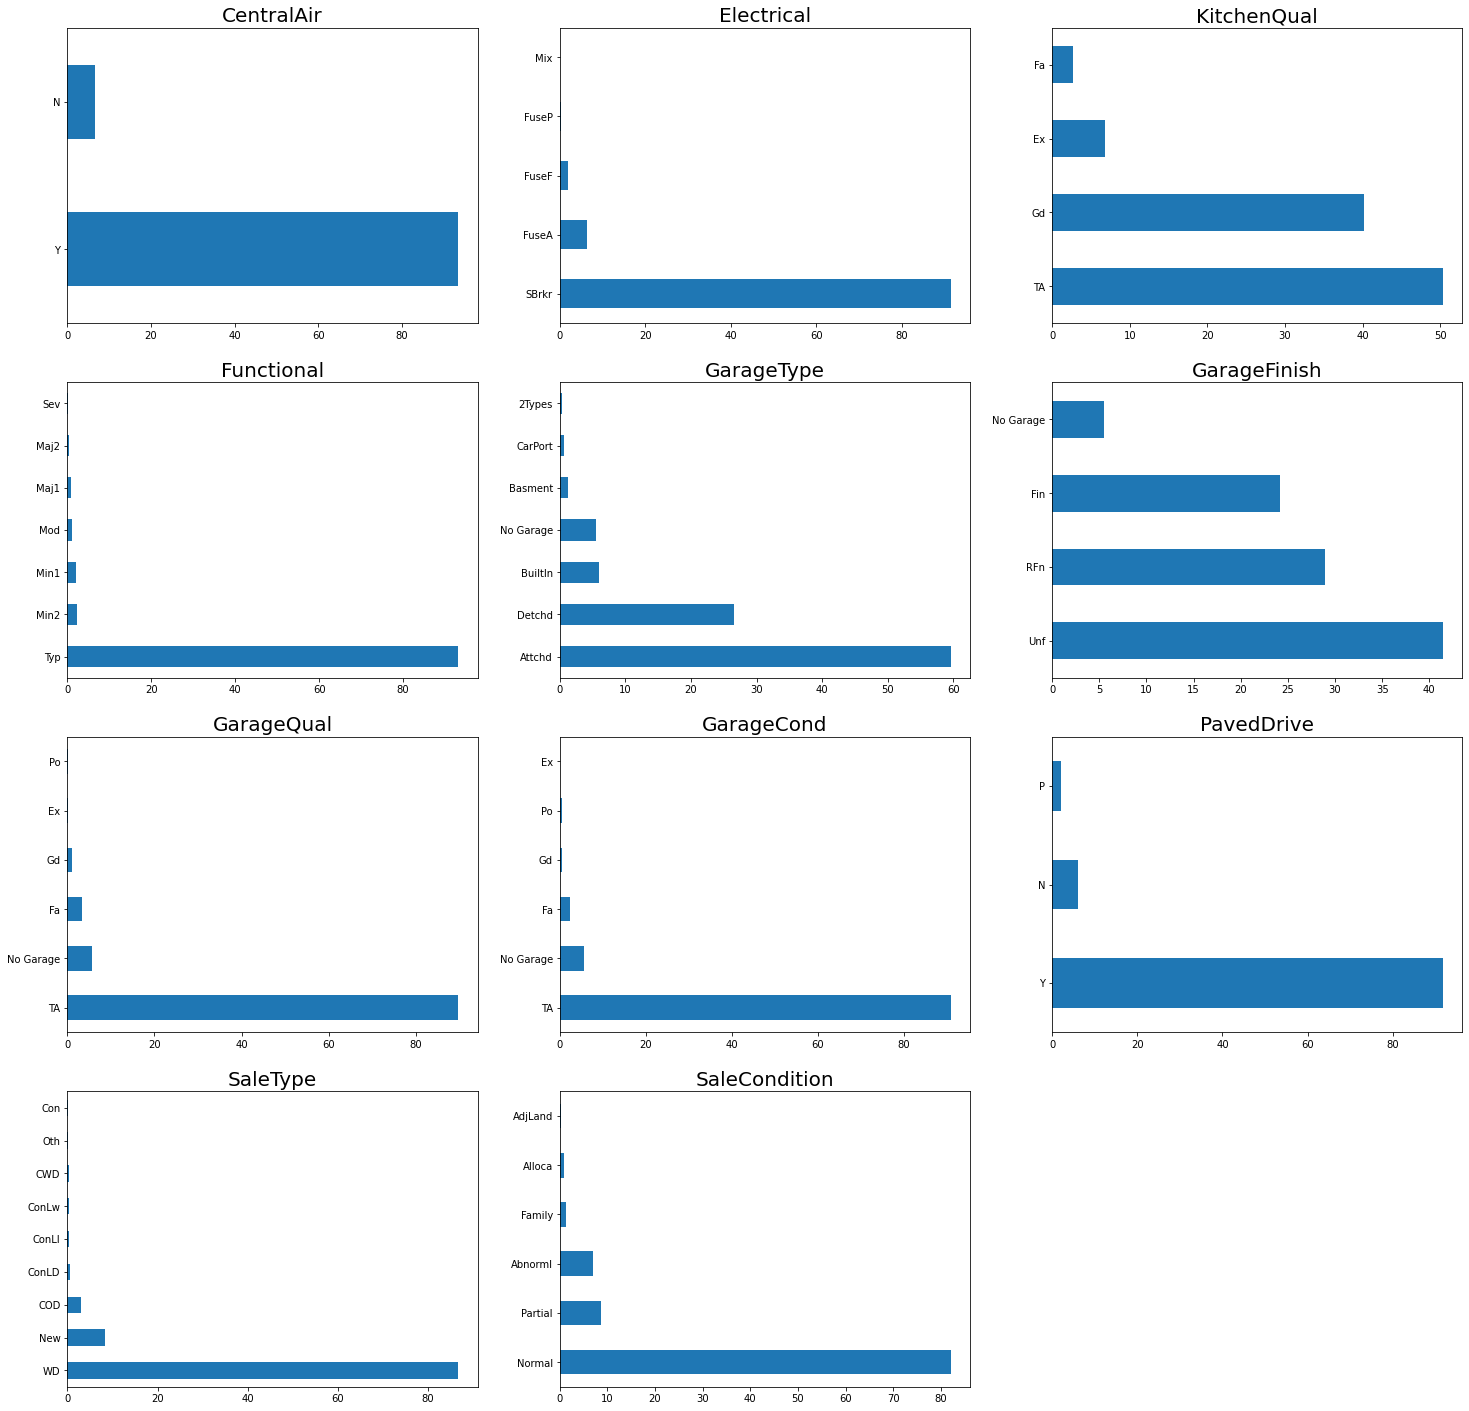

In [994]:
# Plot the next set of categorical variables

plt.figure(figsize = (25,25))

for i in enumerate(df_categorical[27:38]):
    plt.subplot(4,3,i[0]+1)
    (df[i[1]].value_counts(normalize = True)*100).plot.barh()
    plt.title(label = i[1], fontsize = 20)

From the above, we gather that we can drop the following variables:-

* CentralAir
* Electrical
* Functional
* GarageQual
* GarageCond
* PavedDrive
* SaleType
* SaleCondition

We will now proceed to drop the listed variables.

In [995]:
# Dropping skewed categorical variables

df.drop(['CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition',
        'ExterCond','BsmtCond','BsmtFinType2','Heating','Condition2','BldgType','RoofStyle','RoofMatl',
        'MSZoning','Street','LandContour','Utilities','LotConfig','LandSlope','Condition1'],
        axis = 1,inplace = True)

**Label Encode Ordinal Variables**

From the remaining categorical variables, we will now need to assign numerical values to sub categories of ordinal variables. This is necessary for the model to be able to interpret the variable.

In [996]:
# Check remaining number of variables

df_numeric = df.dtypes[df.dtypes != "object"].index
df_categorical = df.dtypes[df.dtypes == 'object'].index

print("Numeric Variables = ",len(df_numeric))
print("Categorical Variables = ",len(df_categorical))

Numeric Variables =  34
Categorical Variables =  15


In [997]:
# View remaining list of categorical variables

df_categorical

Index(['LotShape', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
       'GarageFinish'],
      dtype='object')

The ordinal variables remaining now are:-

* ExterQual
* BsmtQual
* BsmtExposure
* BsmtFinType1
* HeatingQC
* KitchenQual

Let us first see the unique subcategories available in each of these variables.

In [998]:
cols = ['ExterQual','BsmtQual','BsmtExposure','BsmtFinType1','HeatingQC','KitchenQual']
for i in cols:
    print(df[i].unique())

['Gd' 'TA' 'Ex' 'Fa']
['Gd' 'TA' 'Ex' 'No Basement' 'Fa']
['No' 'Gd' 'Mn' 'Av' 'No Basement']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No Basement' 'LwQ']
['Ex' 'Gd' 'TA' 'Fa' 'Po']
['Gd' 'TA' 'Ex' 'Fa']


We will now proceed with label encoding for each of these variables. 

In [999]:
# Replacing strings with numeric entries

df['ExterQual'] = df['ExterQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['BsmtQual'] = df['BsmtQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0})
df['BsmtExposure'] = df['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})
df['BsmtFinType1'] = df['BsmtFinType1'].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0})
df['HeatingQC'] = df['HeatingQC'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
df['KitchenQual'] = df['KitchenQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})

In [1000]:
# Checking the results of the label encoding

df[cols].head(10)

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual
0,4,4,1,6,5,4
1,3,4,4,5,5,3
2,4,4,2,6,5,4
3,3,3,1,5,4,4
4,4,4,3,6,5,4
5,3,4,1,6,5,3
6,4,5,3,6,5,4
7,3,4,2,5,5,3
8,3,3,1,1,4,3
9,3,3,1,6,5,3


Now that we are done exploring categorical vaiables, let us now take a look at the numeric variables as well in terms of skewness. 
We will do this by generating visualiztions using distplot to get a sense of spread for each of the numeric variables.We will generate all of the visualizations together this time (not including the ordinal variables we just created).

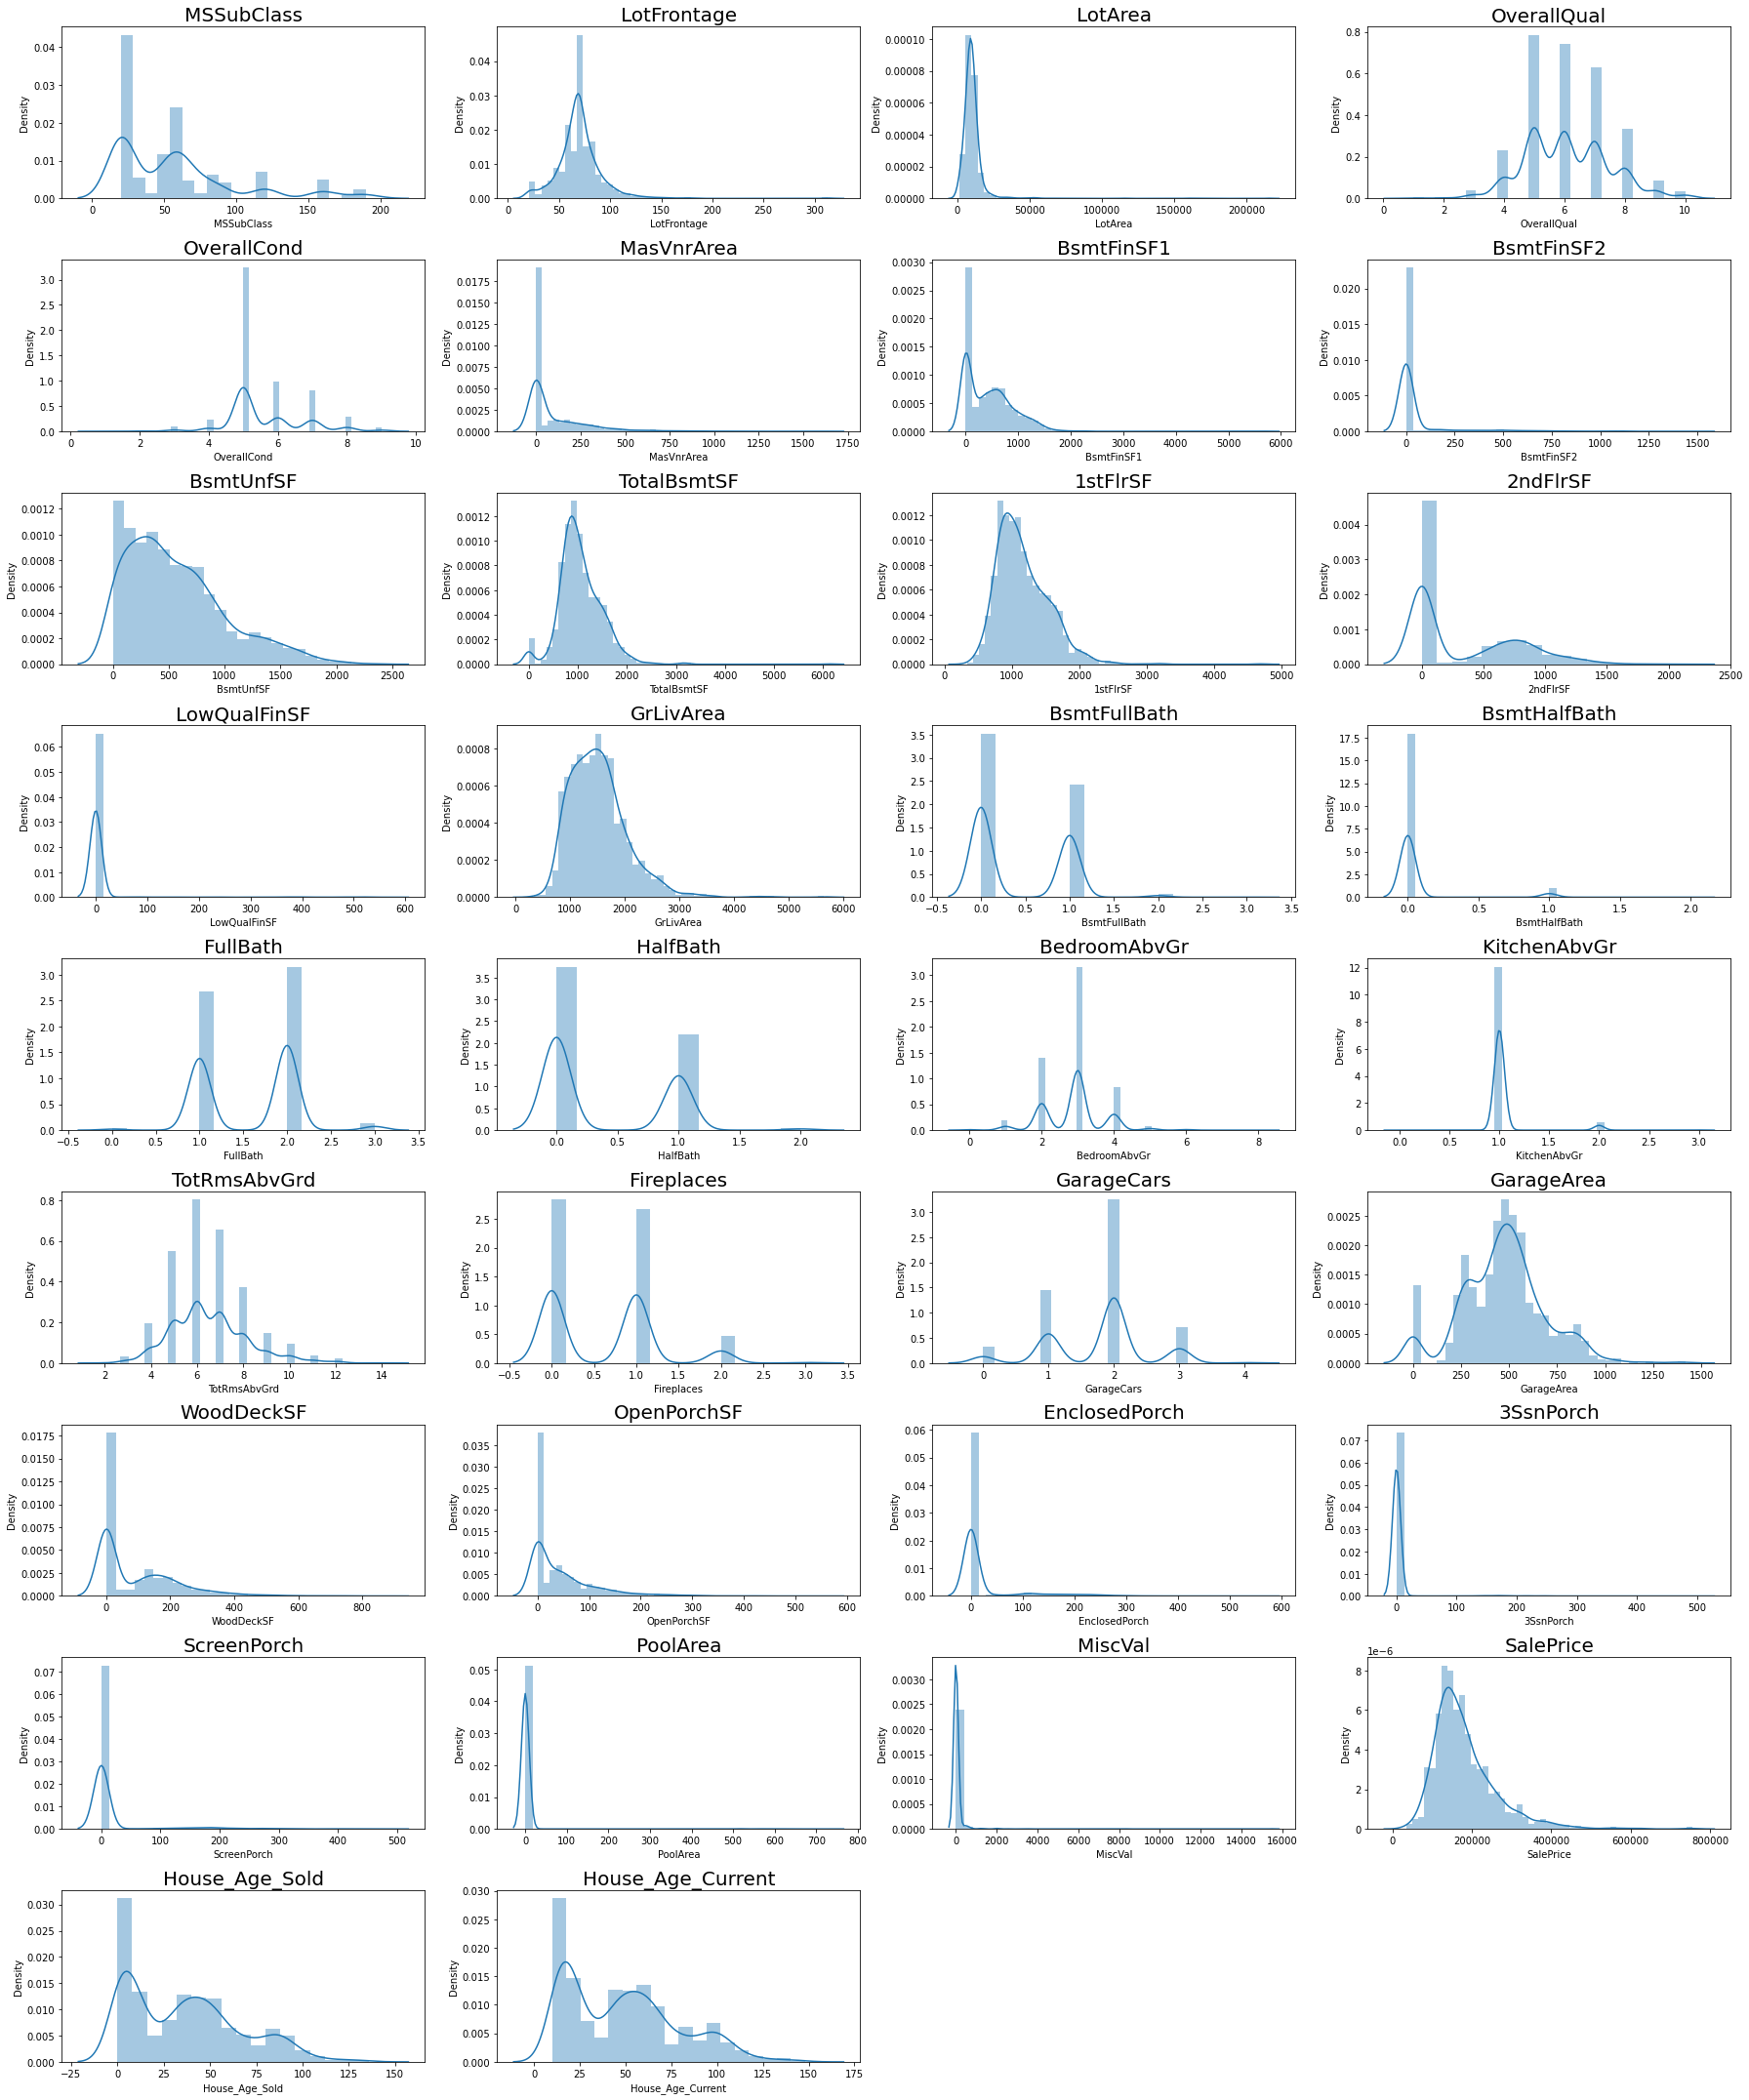

In [1001]:
# Generate visualizations for all of numeric variables

plt.figure(figsize = (25,30))
for i in enumerate(df_numeric):
    plt.subplot(9,4,i[0]+1)
    plt.tight_layout() # Creates space between subplots to avoid overlap
    sns.distplot(df[i[1]])
    plt.title(i[1], fontsize = 20)

What we observe here is that:-

* Some of the variables look similar to Gaussian Distributions but with long tails at one end.
* The dependent variable - SalePrice - in particular is right skewed which is an important observation in the context of our model's ability to predict house prices. This will need to be addressed using a transformation technique to make the distribution more Gaussian.
* Certain other variables are skewed, typically right skewed.
* There are a few numeric variables with multiple peaks, particularly Discrete variables.
* There is also a categorical variable in the mix, namely: MSSubClass. Since this is not an ordinal variable, we will need to convert the variable into string in order to create dummy variables in the next stage.

In [1002]:
# Convert MSSubClass datatype to string

df['MSSubClass'] = df['MSSubClass'].astype(str)

To deal with skewness and even perceived outliers in Numeric variables, we will use SkLearn's PowerTransformer class to deal with skewness and outliers. This will be done as part of Data Preparation prior to initiating model building.

## 2. Data Preparation

### 2.1 Creation of Dummy Variables for Categorical Features

Let us first look at the remaining categorical variables and their respective sub categories.

In [1003]:
# Check current set of variables

df_numeric = df.dtypes[df.dtypes != "object"].index
df_categorical = df.dtypes[df.dtypes == 'object'].index

print("Numeric Variables = ",len(df_numeric))
print("Categorical Variables = ",len(df_categorical))

Numeric Variables =  39
Categorical Variables =  10


In [1004]:
# Print unique sub categories for remaining categorical variables

for i in df_categorical:
    print(i,': ',df[i].unique())

MSSubClass :  ['60' '20' '70' '50' '190' '45' '90' '120' '30' '85' '80' '160' '75' '180'
 '40']
LotShape :  ['Reg' 'IR1' 'IR2' 'IR3']
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Exterior1st :  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd :  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
MasVnrType :  ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
Foundation :  ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
GarageType :  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'No Garag

Since this will be a repetitive process of generating dummy variables followed by concatenation with the base dataset, we will write a function to save time.

In [1005]:
# Create Dummy Generator Function

def dummy_generator(col):
    global df
    dummy_df = pd.get_dummies(df[col],drop_first = True, prefix = col)
    df = pd.concat([df,dummy_df], axis = 1)
    df = df.drop(col,axis = 1)

We will pass a list of categorical variables into the function using a for loop.The drop_first feature of the function will remove one sub category in order to reduce redundancy and multicollinearity.

In [1006]:
for col in df_categorical:
    dummy_generator(col)

In [1007]:
# Check results of the dummy variable concatenation

df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,House_Age_Sold,House_Age_Current,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
0,65.0,8450,7,5,196.0,4,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,2,548,0,61,0,0,0,0,0,208500,5,17,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,80.0,9600,6,8,0.0,3,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,2,460,298,0,0,0,0,0,0,181500,31,44,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,162.0,4,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,2,608,0,42,0,0,0,0,0,223500,7,19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,60.0,9550,7,5,0.0,3,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,3,642,0,35,272,0,0,0,0,140000,91,105,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,84.0,14260,8,5,350.0,4,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,836,192,84,0,0,0,0,0,250000,8,20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [1008]:
# Check the dimensions of the modified dataset

df.shape

(1460, 133)

From a previous total of 49, we are now at 133 variables including the dummy variables.

### 2.2 Train-Test Split of Dataset

Before scaling, we will split the data into Train & Test sets for the purposes of model building.

In [1009]:
# Import necessary packages

from sklearn.model_selection import train_test_split

# Split the data into train & test

df_train,df_test = train_test_split(df,train_size = 0.7,random_state = 200)

### 2.3 Transformation of Numeric Variables

We will use the sklearn's PowerTransformer() to normalize the skewness as well as reduce the effect of outliers. This is required to adhere to an import assumption of Linear Regression: Homoskedasticity. This is particularly important in the case of the dependent variable as earlier stated.

In [1010]:
from sklearn.preprocessing import PowerTransformer

# Instantiate the class

pt = PowerTransformer()

# Fit & transform numeric variables of the training set (excluding dummy variables)

df_train[df_numeric] = pt.fit_transform(df_train[df_numeric])

# Transform the numeric variables of the test set

df_test[df_numeric] = pt.transform(df_test[df_numeric])

Let us now in particular look at the skewness of the dependent variable post transformation.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

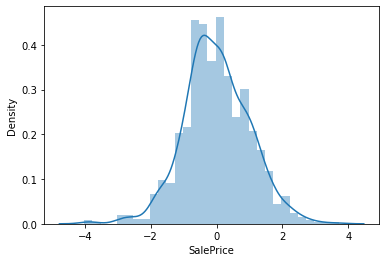

In [1011]:
# Check skewness of the dependent variable

sns.distplot(df_train['SalePrice'])

As we can clearly see, the skewness has been corrected for the variable and therefore is in adherence with our assumption related to Homoskedasticity.

## 3. Model Building

We will now split the training data further for modelling.

In [1012]:
# Splitting the data into X train & y train

X_train = df_train.drop('SalePrice',1)
y_train = df_train['SalePrice']

### 3.1 Feature Selection using RFE

In [1013]:
# Check current number of features in the train set

X_train.shape

(1021, 132)

132 is quite a large number of features. We will therefore employ RFE to eliminate features and trim the list down to the top 25 most important ones.

In [1014]:
# Import necessary packages

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1015]:
# Build LR Model using all features available

lm = LinearRegression()
lm.fit(X_train,y_train)

# Run RFE to bring the list of features down to top 25

rfe = RFE(lm,25)
rfe = rfe.fit(X_train,y_train)

# List all features ranked based on their importance

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 76),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 3),
 ('MasVnrArea', False, 64),
 ('ExterQual', False, 107),
 ('BsmtQual', False, 47),
 ('BsmtExposure', False, 79),
 ('BsmtFinType1', False, 63),
 ('BsmtFinSF1', False, 11),
 ('BsmtFinSF2', False, 106),
 ('BsmtUnfSF', False, 92),
 ('TotalBsmtSF', False, 103),
 ('HeatingQC', False, 52),
 ('1stFlrSF', False, 73),
 ('2ndFlrSF', False, 53),
 ('LowQualFinSF', False, 74),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 65),
 ('BsmtHalfBath', False, 105),
 ('FullBath', False, 55),
 ('HalfBath', False, 50),
 ('BedroomAbvGr', False, 104),
 ('KitchenAbvGr', False, 91),
 ('KitchenQual', False, 81),
 ('TotRmsAbvGrd', False, 67),
 ('Fireplaces', False, 59),
 ('GarageCars', False, 27),
 ('GarageArea', False, 66),
 ('WoodDeckSF', False, 93),
 ('OpenPorchSF', False, 100),
 ('EnclosedPorch', False, 99),
 ('3SsnPorch', False, 102),
 ('ScreenPorch', False, 84),
 ('PoolArea', False, 85),
 ('MiscVal', F

As we can see in the list, only those that have been ranked '1' and marked 'True' will be in our top 25 features going forward.

In [1016]:
# Generate the list of our top 25 features

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['LotArea', 'OverallQual', 'GrLivArea', 'House_Age_Current',
       'MSSubClass_75', 'LotShape_IR3', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_VinylSd', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_Other', 'Exterior2nd_VinylSd', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd'],
      dtype='object')

In [1017]:
# Keep only RFE columns in the train set

X_train = X_train[rfe_col]

### 3.2 Feature Elimination using StatsModels, p-value & VIF

With only 25 variables remaining, we will use StatsModels to check p-value of the remaining features to see if they are statistically significant and VIF to check for multicollinearity. This process may be iterated a few times in case we find that we need to drop one or more variables.

**Statsmodels 1**

In [1018]:
# import necessary packages

import statsmodels.api as sm

# Add constant to X_train

X_train = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train)
lr_model = lr.fit()

In [1019]:
# View summary to compare p-values

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     262.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:24:53   Log-Likelihood:                -413.99
No. Observations:                1021   AIC:                             880.0
Df Residuals:                     995   BIC:                             1008.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4583      0.051     -9.070      0.000      -0.557      -0.359
LotArea                  0.1798      0.014     12.605      0.000       0.152       0.208
OverallQual              0.3109      0.020     15.660      0.000       0.272       0.350
GrLivArea                0.4049      0.020     20.294      0.000       0.366       0.444
House_Age_Current       -0.2511      0.021    -12.054      0.000      -0.292      -0.210
MSSubClass_75            0.4561      0.161      2.841      0.005       0.141       0.771
LotShape_IR3            -0.4904      0.121     -4.059      0.000      -0.727      -0.253
Neighborhood_Crawfor     0.4536      0.067      6.753      0.000       0.322       0.585
Neighborhood_NoRidge     0.3493      0.075      4.679      0.000       0.203       0.496
Neighborhood_NridgHt     0.2725      0.058      4.692      0.000       0.159       0.387
Neighborhood_StoneBr     0.4089      0.097      4.235      0.000       0.219       0.598
HouseStyle_1Story        0.1812      0.032      5.672      0.000       0.119       0.244
HouseStyle_2.5Unf       -0.5856      0.176     -3.321      0.001      -0.932      -0.240
HouseStyle_SFoyer        0.4092      0.080      5.143      0.000       0.253       0.565
HouseStyle_SLvl          0.1920      0.062      3.109      0.002       0.071       0.313
Exterior1st_AsphShn     -0.8766      0.371     -2.361      0.018      -1.605      -0.148
Exterior1st_BrkComm     -2.5172      0.405     -6.216      0.000      -3.312      -1.723
Exterior1st_BrkFace      0.2654      0.067      3.948      0.000       0.133       0.397
Exterior1st_VinylSd     -0.3174      0.136     -2.336      0.020      -0.584      -0.051
Exterior2nd_Brk Cmn      0.3405      0.170      2.008      0.045       0.008       0.673
Exterior2nd_Other        0.3490      0.403      0.865      0.387      -0.443       1.141
Exterior2nd_VinylSd      0.3018      0.136      2.223      0.026       0.035       0.568
GarageType_Attchd        0.3522      0.050      7.066      0.000       0.254       0.450
GarageType_BuiltIn       0.3561      0.074      4.840      0.000       0.212       0.501
GarageType_CarPort      -0.2685      0.157     -1.710      0.088      -0.577       0.040
GarageType_Detchd        0.2998      0.048      6.211      0.000       0.205       0.395
==============================================================================
Omnibus:                      354.985   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2941.514
Skew:                          -1.358   Prob(JB):                         0.00
Kurtosis:                      10.859   Cond. No.                         56.2
==============================================================================

Warnings:
[1] Standard Erro

We can see that variables: **Exterior2nd_Other** and **GarageType_CarPort** have significantly high p-value of 0.387 and 0.088 respectively. Let us also look at collinearity by calculating VIF before deciding on which variable to drop first.

**Calculate VIF**

In [1020]:
# X train set without constant

X_train.drop(['const'],axis = 1,inplace = True)

#Calculate VIF for StatsModel 1

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create a dataframe to insert VIF values and compare features

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF', ascending = False, inplace = True)


In [1021]:
# print vif

vif

,Features,VIF
17,Exterior1st_VinylSd,48.91
20,Exterior2nd_VinylSd,47.60
10,HouseStyle_1Story,3.43
21,GarageType_Attchd,3.30
3,House_Age_Current,2.98
1,OverallQual,2.91
2,GrLivArea,2.90
4,MSSubClass_75,1.90
11,HouseStyle_2.5Unf,1.84
24,GarageType_Detchd,1.81


We can see there are variables with extremely high VIFs. The priority we will follow to remove features is as follows:-

* High-High: High p-value, high VIF
* High-Low:
    * High p-value, low VIF
    * Low p-value, high VIF

Feature elimination will be only one at a time as other features may stabilize upon dropping a feature.

Going by the above process, we will eliminate **Exterior2nd_Other**.

In [1022]:
# Drop variable

X_train.drop('Exterior2nd_Other',1,inplace = True)

We will move to the next round of model building using Statsmodels to view the refreshed p-value and VIF. Before that, let us create a function as this process is likely to be repetitive.

In [1023]:
# Create statsmodels function

def statsmodels_func(X_train,y_train):
    X_train = sm.add_constant(X_train)
    lr = sm.OLS(y_train,X_train)
    lr_model = lr.fit()
    print(lr_model.summary())
    
# Create VIF function

def vif_calc(X_train):

    #Calculate VIF for StatsModel

    from statsmodels.stats.outliers_influence import variance_inflation_factor

    #Create a dataframe to insert VIF values and compare features

    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by = 'VIF', ascending = False, inplace = True)
    print(vif)

**Statsmodels 2**

In [1024]:
# Generate Model Summary

statsmodels_func(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     273.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:24:53   Log-Likelihood:                -414.37
No. Observations:                1021   AIC:                             878.7
Df Residuals:                     996   BIC:                             1002.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4578 

**GarageType_CarPort** still has a high p-value of 0.087. Let us now check VIF as well.

In [1025]:
# Generate VIF

vif_calc(X_train)

                Features    VIF
17   Exterior1st_VinylSd  43.30
19   Exterior2nd_VinylSd  42.19
10     HouseStyle_1Story   3.43
20     GarageType_Attchd   3.29
3      House_Age_Current   2.98
1            OverallQual   2.91
2              GrLivArea   2.90
4          MSSubClass_75   1.90
11     HouseStyle_2.5Unf   1.84
23     GarageType_Detchd   1.81
0                LotArea   1.46
21    GarageType_BuiltIn   1.40
8   Neighborhood_NridgHt   1.36
18   Exterior2nd_Brk Cmn   1.28
15   Exterior1st_BrkComm   1.21
12     HouseStyle_SFoyer   1.20
13       HouseStyle_SLvl   1.18
7   Neighborhood_NoRidge   1.15
6   Neighborhood_Crawfor   1.13
9   Neighborhood_StoneBr   1.11
16   Exterior1st_BrkFace   1.10
5           LotShape_IR3   1.08
22    GarageType_CarPort   1.03
14   Exterior1st_AsphShn   1.01


Going by the priorities listed earlier, this time we will drop **GarageType_CarPort**

In [1026]:
# Drop variable

X_train.drop('GarageType_CarPort',1,inplace = True)

**Statsmodels 3**

In [1027]:
# Generate Model Summary

statsmodels_func(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     284.5
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:24:53   Log-Likelihood:                -415.87
No. Observations:                1021   AIC:                             879.7
Df Residuals:                     997   BIC:                             998.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4782 

We can see that p-values are within acceptable limits this time. Let's check VIF now.

In [1028]:
# Generate VIF

vif_calc(X_train)

                Features    VIF
17   Exterior1st_VinylSd  43.30
19   Exterior2nd_VinylSd  42.19
10     HouseStyle_1Story   3.41
20     GarageType_Attchd   3.28
3      House_Age_Current   2.98
2              GrLivArea   2.88
1            OverallQual   2.88
4          MSSubClass_75   1.90
11     HouseStyle_2.5Unf   1.84
22     GarageType_Detchd   1.80
0                LotArea   1.46
21    GarageType_BuiltIn   1.40
8   Neighborhood_NridgHt   1.36
18   Exterior2nd_Brk Cmn   1.28
15   Exterior1st_BrkComm   1.21
12     HouseStyle_SFoyer   1.19
13       HouseStyle_SLvl   1.18
7   Neighborhood_NoRidge   1.15
6   Neighborhood_Crawfor   1.13
9   Neighborhood_StoneBr   1.11
16   Exterior1st_BrkFace   1.10
5           LotShape_IR3   1.08
14   Exterior1st_AsphShn   1.01


We will drop the variable **Exterior1st_VinylSd** which has a very high VIF of 43.30

In [1029]:
X_train.drop('Exterior1st_VinylSd',1, inplace = True)

**Statsmodels 4**

In [1030]:
# Generate Model Summary

statsmodels_func(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     296.1
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:24:53   Log-Likelihood:                -418.27
No. Observations:                1021   AIC:                             882.5
Df Residuals:                     998   BIC:                             995.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4788 

**Exterior2nd_VinylSd** has significantly high p-value of 0.87. Moving on to VIF.

In [1031]:
# Generate VIF

vif_calc(X_train)

                Features   VIF
10     HouseStyle_1Story  3.41
19     GarageType_Attchd  3.27
3      House_Age_Current  2.97
2              GrLivArea  2.87
1            OverallQual  2.86
18   Exterior2nd_VinylSd  2.22
4          MSSubClass_75  1.90
11     HouseStyle_2.5Unf  1.84
21     GarageType_Detchd  1.80
0                LotArea  1.44
20    GarageType_BuiltIn  1.38
8   Neighborhood_NridgHt  1.32
17   Exterior2nd_Brk Cmn  1.27
15   Exterior1st_BrkComm  1.21
12     HouseStyle_SFoyer  1.19
13       HouseStyle_SLvl  1.18
7   Neighborhood_NoRidge  1.15
6   Neighborhood_Crawfor  1.13
9   Neighborhood_StoneBr  1.11
16   Exterior1st_BrkFace  1.10
5           LotShape_IR3  1.08
14   Exterior1st_AsphShn  1.01


This time, VIF is within acceptable limits. We will therefore drop **Exterior2nd_VinylSd**

In [1032]:
# Drop variable

X_train.drop('Exterior2nd_VinylSd',1,inplace = True)

**StatsModels 5**

In [1033]:
# Generate Model Summary

statsmodels_func(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     310.5
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:24:53   Log-Likelihood:                -418.28
No. Observations:                1021   AIC:                             880.6
Df Residuals:                     999   BIC:                             989.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4812 

p-values are within acceptable limits. Moving on to VIF.

In [1034]:
# Generate VIF

vif_calc(X_train)

                Features   VIF
10     HouseStyle_1Story  3.41
2              GrLivArea  2.87
1            OverallQual  2.85
18     GarageType_Attchd  2.82
3      House_Age_Current  2.44
4          MSSubClass_75  1.90
11     HouseStyle_2.5Unf  1.84
20     GarageType_Detchd  1.59
0                LotArea  1.44
8   Neighborhood_NridgHt  1.32
19    GarageType_BuiltIn  1.30
17   Exterior2nd_Brk Cmn  1.27
15   Exterior1st_BrkComm  1.21
12     HouseStyle_SFoyer  1.18
13       HouseStyle_SLvl  1.18
7   Neighborhood_NoRidge  1.15
6   Neighborhood_Crawfor  1.13
9   Neighborhood_StoneBr  1.10
16   Exterior1st_BrkFace  1.10
5           LotShape_IR3  1.08
14   Exterior1st_AsphShn  1.01


Both p-values and VIF have stabilized. With the current set of features, we have completed the process of eliminating unnecessary features. Let us take a quick at the features in hand now in our training set.

In [1035]:
X_train.columns

Index(['LotArea', 'OverallQual', 'GrLivArea', 'House_Age_Current',
       'MSSubClass_75', 'LotShape_IR3', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'HouseStyle_1Story', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior2nd_Brk Cmn', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd'],
      dtype='object')

In [1036]:
# Dimensions of X_train

X_train.shape

(1021, 21)

We are down to 21 features. The next step for us is model building using a regularizer. For this process, we will consider 2 regression methods, Ridge & Lasso Regression. As part of this exercise, we will compare results from both of these regression techniques.

### 3.3 Ridge Regression

In [1037]:
# Import necessary packages

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In Ridge Regression, we use Regularizer term (referred to as Lambda statistically and Alpha in our code) to control for error and therefore variance of the model. We will use GridSearchCV to identify the optimal 'Alpha' by running several iterations of different Alpha values over our training set. We will start by making a list of Alphas that we can try out on our training set.

In [1038]:
# List of Alphas

params = {'alpha':[0.01,0.015,0.02,0.025,0.03,0.035,
                   0.04,0.045,0.05,0.06,0.07,0.08,
                   0.09,0.1,0.2, 0.3,0.4, 0.5, 
                   0.6,0.7, 0.8,0.9, 1.0, 2.0,
                   3.0,4.0,5.0]}

Next step is to instantiate Ridge Regression and then use Grid Search to iterate the different alpha values through the regression technique. We will use the trainset with a 5 fold approach - 4 parts for training and 1 for validation.

In [1039]:
# Instantiate Ridge

ridge = Ridge()

# Instantiate Cross Validation with 5 folds

model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       cv = 5,
                       scoring = 'neg_mean_absolute_error',
                       return_train_score = True,
                       verbose = 1)

# Fit CV with training data

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04,
                                   0.045, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Lets take a look at the results from the CV technique. For that, it will first need to be transformed into a Dataframe.

In [1040]:
cv_results = pd.DataFrame(model_cv.cv_results_)

In [1041]:
# View Results

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007943,0.003818,0.005693,0.004580,0.01,{'alpha': 0.01},-0.245721,-0.260961,-0.271256,-0.306618,-0.273755,-0.271662,0.020070,11,-0.266694,-0.267831,-0.260444,-0.250178,-0.258950,-0.260819,0.006333
1,0.011411,0.001979,0.002201,0.001444,0.015,{'alpha': 0.015},-0.245749,-0.260953,-0.271235,-0.306584,-0.273773,-0.271659,0.020052,9,-0.266712,-0.267830,-0.260458,-0.250201,-0.258975,-0.260835,0.006327
2,0.006765,0.005443,0.003503,0.002575,0.02,{'alpha': 0.02},-0.245776,-0.260945,-0.271214,-0.306549,-0.273791,-0.271655,0.020034,7,-0.266734,-0.267830,-0.260472,-0.250223,-0.259001,-0.260852,0.006322
3,0.006857,0.002062,0.000598,0.000488,0.025,{'alpha': 0.025},-0.245803,-0.260936,-0.271194,-0.306516,-0.273808,-0.271651,0.020017,6,-0.266762,-0.267829,-0.260486,-0.250246,-0.259026,-0.260870,0.006318
4,0.005699,0.003497,0.005365,0.003009,0.03,{'alpha': 0.03},-0.245829,-0.260928,-0.271174,-0.306482,-0.273826,-0.271648,0.020000,4,-0.266789,-0.267829,-0.260500,-0.250268,-0.259050,-0.260887,0.006314


Clearly, viewing the DataFrame does not immediately inform us which Alpha value worked best for predictive power. We will plot the scores of the test and validation sets against each of the Alphas and visually approximate a favourable value.

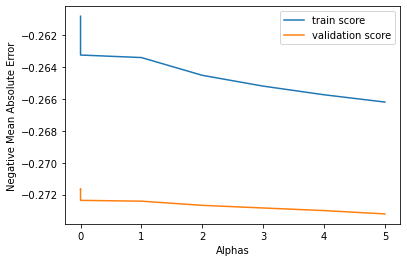

In [1042]:
# Plot test & validation scores against Alphas
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('Alphas')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','validation score'])
plt.show()

Negative Mean Absolute Error score is considered better when it is larger. Visually, we can see that the both train and validation related scores dip to the more negative end almost immediately after the Alpha value passes 0. This suggests that the optimal Alpha is very close to 0.

We can alternatively use GridSearchCV's best_estimator parameter to find the optimal Alpha.

In [1043]:
# Find optimal alpha value

model_cv.best_estimator_

Ridge(alpha=0.035)

**Model Evaluation**

With the optimal Alpha determined, let's verify the predictive power by finding the R2 Score for both train and test datasets.

In [1044]:
# Split the test data into X_test and y_test

X_test = df_test[X_train.columns] # Keeping the top 21 columns identified using RFE & StatsModels
y_test = df_test['SalePrice']

In [1045]:
# Instantiate Ridge with Alpha - 0.035 and fit the train data

ridge = Ridge(alpha = 0.035)
ridge.fit(X_train,y_train)

Ridge(alpha=0.035)

In [1046]:
# Predict the y_train and y_test data using the Ridge model

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Import r2_score to evaluate predictive power 

from sklearn.metrics import r2_score

# Calculate r2 for both train & test

r2_train = r2_score(y_true = y_train,y_pred = y_train_pred)
r2_test = r2_score(y_true = y_test,y_pred = y_test_pred)

print('r2_train_score: ',r2_train)
print('r2_test_score: ',r2_test)

r2_train_score:  0.8671388155133403
r2_test_score:  0.8177472552320116


The r2 scores are 0.867 and 0.817 for train and test datasets respectively and are pretty good scores. Let's list the final set of features and their respective coefficients before moving on Lasso Regression for an alternate approach.

In [1047]:
# Ridge Regression - Final features packaged in a DataFrame

pd.DataFrame(zip(X_train.columns,ridge.coef_)).sort_values(by = [1])

,0,1
15,Exterior1st_BrkComm,-2.418645
14,Exterior1st_AsphShn,-0.822021
11,HouseStyle_2.5Unf,-0.580483
5,LotShape_IR3,-0.487257
3,House_Age_Current,-0.245971
10,HouseStyle_1Story,0.181452
0,LotArea,0.181856
13,HouseStyle_SLvl,0.198458
8,Neighborhood_NridgHt,0.247829
16,Exterior1st_BrkFace,0.268833


### 3.4 Lasso Regression

The process for Lasso Regression is similar to Ridge with only a difference interpreting the results of the final model. We will once again use GridSearchCV to determine the optimum Alpha followed by model building and checking r2 scores.

In [1048]:
# import necessary package

from sklearn.linear_model import Lasso

In [1049]:
# List of Alphas to check

params = {'alpha':[0.00001,0.00002,0.00003,0.00004,0.00005,0.00001,0.00005,0.0001,0.0005,0.001,
                  0.005,0.01,0.05,0.1,0.5,1,2]}

In [1050]:
# Instantiate Lasso

lasso = Lasso()

In [1051]:
# Instantiate Cross Validation with 5 folds

model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       cv = 5,
                       scoring = 'neg_mean_absolute_error',
                       return_train_score = True,
                       verbose = 1)

# Fit CV with training data

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 1e-05,
                                   5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01,
                                   0.05, 0.1, 0.5, 1, 2]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1052]:
# View Results

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008219,0.004702,0.002418,0.003213,1e-05,{'alpha': 1e-05},-0.245696,-0.260955,-0.271275,-0.306623,-0.273749,-0.27166,0.020078,7,-0.266672,-0.267822,-0.260418,-0.250156,-0.258917,-0.260797,0.006337
1,0.007183,0.002243,0.005444,0.002885,2e-05,{'alpha': 2e-05},-0.245727,-0.260932,-0.271252,-0.306557,-0.273780,-0.27165,0.020050,6,-0.266677,-0.267812,-0.260421,-0.250180,-0.258928,-0.260804,0.006327
2,0.002375,0.003007,0.004809,0.003927,3e-05,{'alpha': 3e-05},-0.245759,-0.260908,-0.271228,-0.306492,-0.273811,-0.27164,0.020023,5,-0.266691,-0.267803,-0.260424,-0.250204,-0.258944,-0.260813,0.006318
3,0.005921,0.003488,0.002629,0.003347,4e-05,{'alpha': 4e-05},-0.245790,-0.260885,-0.271204,-0.306427,-0.273842,-0.27163,0.019995,4,-0.266713,-0.267796,-0.260427,-0.250229,-0.258960,-0.260825,0.006311
4,0.007634,0.001628,0.006440,0.002810,5e-05,{'alpha': 5e-05},-0.245822,-0.260862,-0.271181,-0.306361,-0.273873,-0.27162,0.019968,2,-0.266737,-0.267789,-0.260431,-0.250253,-0.258977,-0.260837,0.006305


Once again, we will visually approximate the optimal Alpha for Lasso Regression.

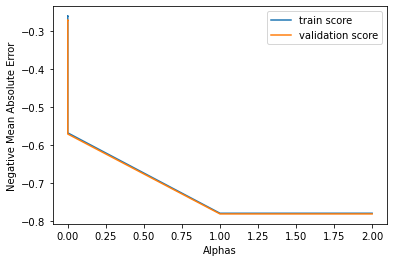

In [1053]:
# Plot test & validation scores against Alphas
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('Alphas')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','validation score'])
plt.show()

From the visualization, it is hard to tell which is the optimal alpha. We can use the alternate option of determining it using Grid Search's best estimator.

In [1054]:
# Best Estimator for Alpha

model_cv.best_estimator_

Lasso(alpha=0.0001)

**Model Evaluation**

Once again, with alpha decided, we will now verify the predictive power by finding the R2 Score for both train and test datasets.

In [1055]:
# Instantiate Lasso with Alpha - 0.0001 and fit the train data

lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [1056]:
# Predict the y_train and y_test data using the Lasso model

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Import r2_score to evaluate predictive power 

from sklearn.metrics import r2_score

# Calculate r2 for both train & test

r2_train = r2_score(y_true = y_train,y_pred = y_train_pred)
r2_test = r2_score(y_true = y_test,y_pred = y_test_pred)

print('r2_train_score: ',r2_train)
print('r2_test_score: ',r2_test)

r2_train_score:  0.867106812940634
r2_test_score:  0.818177232169179


The r2 scores are 0.867 and 0.818 for train and test datasets respectively This is only by a very thin margin better than Ridge which scored 0.817 for the test dataset.

Finally, we will list the coefficients of Lasso. The difference here could be that Lasso may have eliminated a few more features by bringing their coefficients down to 0. This is a special quality of Lasso which also helps reduce the complexity of the model.

In [1057]:
# Coefficients of Lasso model

lasso.coef_

array([ 0.18152417,  0.31784547,  0.4010473 , -0.24565946,  0.42408578,
       -0.47801288,  0.4497897 ,  0.34369055,  0.24517307,  0.40702895,
        0.17987627, -0.55049311,  0.40166293,  0.19494606, -0.75082859,
       -2.37686362,  0.26610573,  0.30848019,  0.36560944,  0.35335722,
        0.31338275])

We see that Lasso has determined the remaining features to be significant as no coefficients are 0. Below,we list the features with their corresponding coefficients that indicate their positive or negative impact on Sale Price.

In [1058]:
# Lasso Regression - Final features packaged in a DataFrame

pd.DataFrame(zip(X_train.columns,lasso.coef_)).sort_values(by = [1])

,0,1
15,Exterior1st_BrkComm,-2.376864
14,Exterior1st_AsphShn,-0.750829
11,HouseStyle_2.5Unf,-0.550493
5,LotShape_IR3,-0.478013
3,House_Age_Current,-0.245659
10,HouseStyle_1Story,0.179876
0,LotArea,0.181524
13,HouseStyle_SLvl,0.194946
8,Neighborhood_NridgHt,0.245173
16,Exterior1st_BrkFace,0.266106


## Summary

In conclusion, we were able to determine the optimal alphas (or lambdas) for both Ridge & Lasso Regression:-

* Ridge Regression Alpha = **0.035**
* Lasso Regression Alpha = **0.0001**

We were also able to arrive at a final list of **21 important variables** and their respective coefficients that help us understand the positive and negative impacts of each of these variables on the Sale Price. With a model of **r2 score = 0.81**(approximate score for both Ridge and Lasso on test data),this will help our client Surprise Housing predict sale prices with high accuracy.

Our top 5 variables based on the results from both Ridge & Lasso are:-

* Exterior1st_BrkComm 
* Exterior1st_AsphShn
* HouseStyle_2.5Unf 
* LotShape_IR3
* Neighborhood_Crawfor